# **Predictive Maintenance for Industrial Equipment**
*   **Tarek Salameh, 20190217.**
*   **AlWaleed Alalami, 20200005**


# **Importing necessary libraries for Google Colab file management**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Importing Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from past.builtins import xrange
from scipy.special import expit

%matplotlib inline

*    **This section imports all necessary libraries.**


# **Load and Inspect Data**

In [ ]:
# Load the dataset from a specified Google Drive path
data = pd.read_csv("/content/drive/MyDrive/22570-Assignments/Project9-NaiveBayes/data/predictive_maintenance.csv")

# Displaying the first few rows to understand the dataset's structure
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


*     **Ensure the file path is correct and accessible.**



# **Data Preprocessing**

In [ ]:
# Separating the dataset into features (X) and the target variable (y)
X = data.drop(['Target', 'Failure Type', 'Product ID'], axis=1)
y = data['Target']

In [ ]:
# Identifying categorical and numerical columns for preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

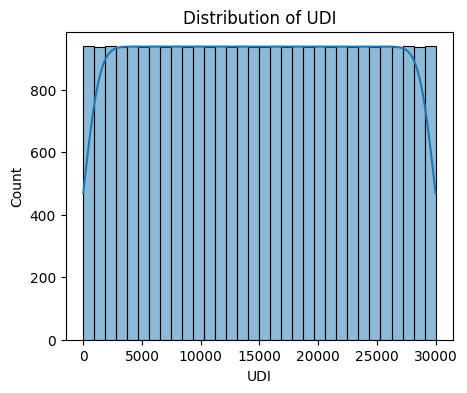

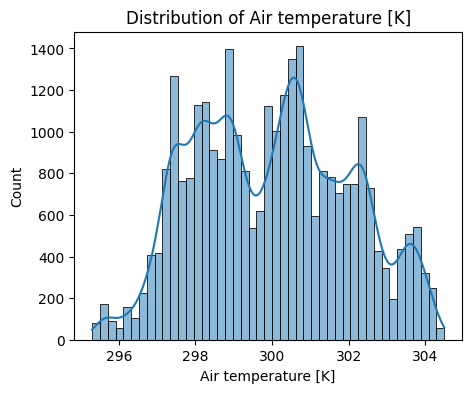

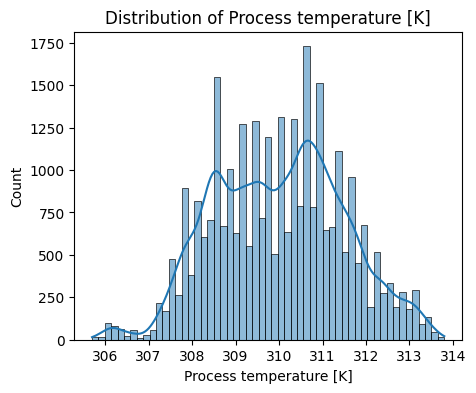

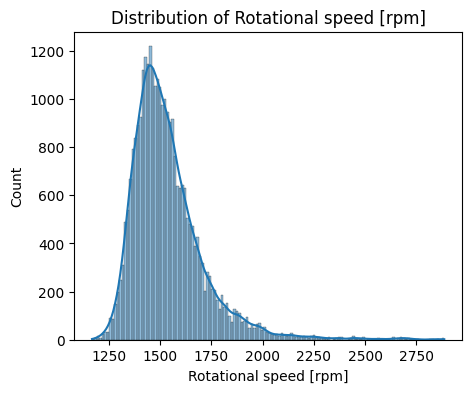

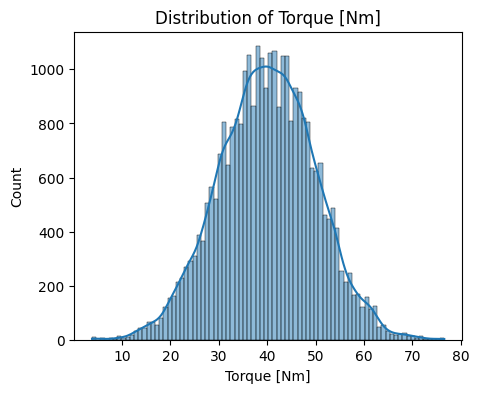

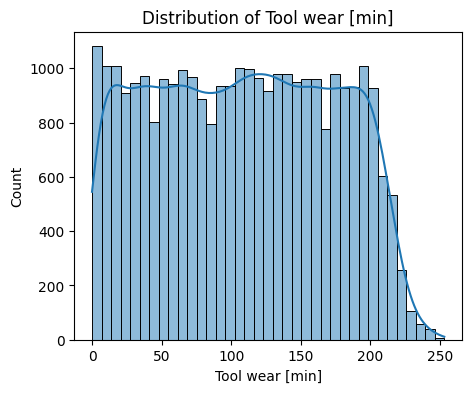

In [ ]:
# Exploratory Data Analysis (EDA): Visualizing distributions of numeric columns
# Helps in understanding the spread and skewness of the data
for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(data[col], kde=True, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.show()

*   **It's good practice to separate the features from the target variable early on.**
*   **Also, identifying column types is crucial for appropriate preprocessing.**

# **Data Transformation**

In [ ]:
# Creating a column transformer for preprocessing steps
# StandardScaler is used to normalize numerical features
# OneHotEncoder is used to convert categorical variables into a form that could be provided to ML algorithms
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [ ]:
# Splitting data into training and testing sets
# This is important to evaluate the model on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Applying transformations to training and testing data
# Ensures that the model training and predictions are on data that is processed in the same way
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)



*   **The preprocessing steps are well-defined.**
*   **We used StandardScaler for numerical columns and OneHotEncoder for categorical columns**
*   **Also, splitting the data before applying transformations is a good practice to prevent data leakage.**



# **Model Building and Evaluation**

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train_transformed, y_train)

GaussianNB()

In [ ]:
cv_scores = cross_val_score(nb_model, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f'CV ROC-AUC Scores: {cv_scores}')
print(f'Mean CV ROC-AUC Score: {np.mean(cv_scores)}')

CV ROC-AUC Scores: [0.94806747 0.92334995 0.9475889  0.95016433 0.93346309]
Mean CV ROC-AUC Score: 0.9405267484743384


In [ ]:
y_pred = nb_model.predict(X_test_transformed)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test_transformed)[:, 1])

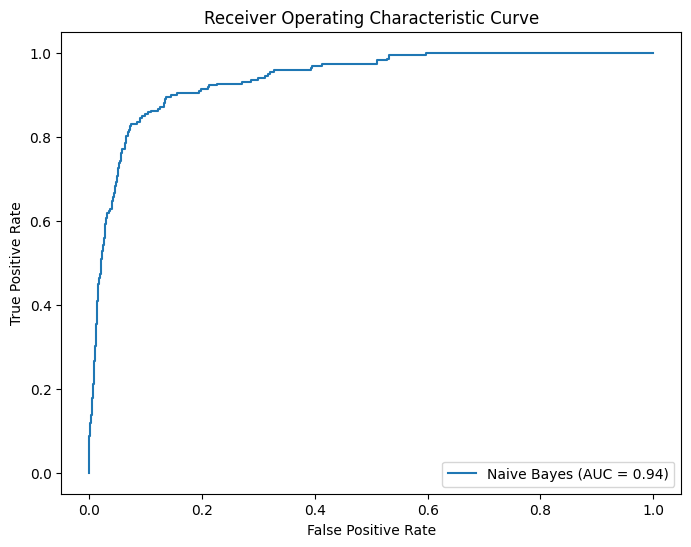

In [ ]:
fpr, tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test_transformed)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

*   The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
*   In other words, the closer the curve is to the top left corner, the better the model is at distinguishing between the two classes.
*   In our case, the label f'Random Forest (AUC = {roc_auc:.2f})' suggests that the Area Under the Curve (AUC) is also calculated.
*   This AUC value gives us a single number summary of the model performance — the higher the AUC, the better the model is at distinguishing between positive and negative classes. An AUC of 0.5 would mean no discriminative ability, close to random guessing.

*   We need the ROC curve because of:
*   Imbalanced Classes: Our dataset has imbalanced classes (As failures are much less common than non-failures in our data), the ROC curve can be particularly useful.
*   It helps in understanding how well the model performs in such scenarios.

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9648333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      5782
           1       0.53      0.33      0.41       218

    accuracy                           0.96      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.96      0.96      0.96      6000

ROC-AUC Score: 0.9380488006118323


**This section covers model training:**
1.   **Cross-Validation**
2.   **Feature Importance Analysis**
3.   **Predictions**
4.   **Evaluation**

*   **The steps are well-structured and cover key aspects of model evaluation.**
*   **The use of ROC-AUC, accuracy, and a classification report provides a comprehensive understanding of model performance.**





  **The model has been successfully built and evaluated. Here are the results:**

  **Accuracy: The model achieved an accuracy of approximately 96.48% on the test set.**

  **Classification Report:**

  **1. For class '0' (non-failure): Precision is 98%, recall is 99%, and F1-score is 98%.**

  **2. For class '1' (failure): Precision is 53%, recall is 33%, and F1-score is 41%.**

  **The Naive Bayes model demonstrates excellent performance in identifying non-failure instances, as indicated by the high precision, recall, and F1-score for class '0'. It's highly reliable in correctly labeling non-failure cases and not misclassifying them as failures.
For failure instances (class '1'), however, the model's performance is significantly weaker. The low precision and recall suggest that it struggles to correctly identify failure cases. Many actual failures are being missed (high false negatives), and many instances are incorrectly labeled as failures (high false positives).**
  
  **ROC-AUC Score: The ROC-AUC score is approximately 0.93, indicating a high level of separability between the classes.**

  *     **The ROC curve displayed also supports the high ROC-AUC score, showing good model performance.**
  *     **Looking at the ROC curve and the AUC score in your model, we can assess how well our Naive Bayes Classifier is performing in terms of balancing sensitivity (identifying positive cases) and specificity (avoiding false alarms).**